In [ ]:
%pip install matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# ============================================================
# GenAI Evaluation via Hypothesis Testing
# ============================================================
# Use case:
# Does adding Retrieval-Augmented Generation (RAG) lead to
# statistically significant accuracy improvements over a
# fine-tuned LLM for the SAME set of user questions?
#
# Goal of this notebook:
# Move from "it looks better" → "we can prove it statistically"


In [6]:
# Core numerical and statistical libraries
import numpy as np
from scipy.stats import norm

# Visualization
import matplotlib.pyplot as plt


In [26]:
# ------------------------------------------------------------
# Experiment Design
# ------------------------------------------------------------
# - 120 real user queries (e.g., enterprise Q&A)
# - Each query is answered by:
#     1. Fine-tuned LLM
#     2. RAG-enabled LLM
# - Answers are scored (0–100) by an evaluation model

np.random.seed(40)
n_queries = 120


In [27]:
# Simulate GenAI evaluation scores
# Fine-tuned model:
# Limited by training cutoff and missing enterprise knowledge
ft_scores = np.random.normal(
    loc=70,   # average accuracy
    scale=7,  # higher variance
    size=n_queries
)

# RAG-enabled model:
# Grounded by retrieval over up-to-date documents
rag_scores = np.random.normal(
    loc=76,   # higher average accuracy
    scale=6,  # more stable responses
    size=n_queries
)


In [28]:
ft_scores

array([65.74716612, 69.1170451 , 65.20775549, 76.50100324, 57.08919276,
       66.73098303, 86.0474324 , 73.42167038, 74.97186893, 77.3887411 ,
       70.3785117 , 71.80567391, 74.11797155, 76.19670967, 62.88095083,
       69.06414878, 66.93270149, 73.45410446, 68.60693616, 61.07511475,
       72.05445908, 70.76265218, 70.2220875 , 78.90847904, 77.5001353 ,
       72.91072609, 80.85475462, 67.82034758, 60.34532065, 79.59986151,
       70.19398157, 67.75720296, 64.07680716, 66.96599756, 60.64075847,
       71.46420519, 60.02975089, 66.12566203, 70.52359051, 66.46066117,
       77.36685449, 76.79980285, 70.53782077, 66.95499457, 73.87096079,
       71.86701414, 70.06292586, 74.48771927, 68.7560499 , 74.87394328,
       61.67892432, 67.67812201, 70.21053297, 62.2445938 , 66.15052571,
       55.76963309, 79.85542462, 74.43175784, 85.4892282 , 66.31378405,
       73.80017175, 69.40864207, 79.04410511, 68.76302602, 81.81451006,
       62.6737052 , 74.49484146, 68.78926784, 62.21554518, 69.85

In [29]:
rag_scores

array([72.68100088, 74.72469525, 71.599061  , 78.22437355, 82.18541558,
       77.82396002, 79.43858089, 68.68847341, 71.37117463, 73.88494479,
       96.62469368, 78.14620324, 77.34780317, 77.90391732, 74.72648936,
       74.11855477, 85.77841446, 77.04054932, 76.68693936, 76.52838014,
       77.82372123, 73.72301425, 70.65775239, 81.33111577, 81.14722133,
       80.6104524 , 79.6215777 , 77.5519884 , 64.29958615, 72.16092725,
       73.52018357, 77.38936274, 71.62001195, 85.70778488, 66.89783807,
       78.73601658, 70.83844144, 69.64566108, 71.54574546, 74.88163842,
       74.03969697, 80.82595424, 77.24785779, 75.77117775, 81.52165692,
       72.73677829, 87.20954179, 86.61609976, 73.30035901, 67.96155631,
       81.69064264, 85.16701302, 74.45838844, 67.63068737, 76.4963457 ,
       74.43884334, 78.66884414, 81.32378742, 68.18429381, 74.99904595,
       65.76507025, 74.67778751, 79.27765754, 80.92005226, 74.17822274,
       86.45050657, 81.256218  , 80.77070436, 73.65065585, 69.24

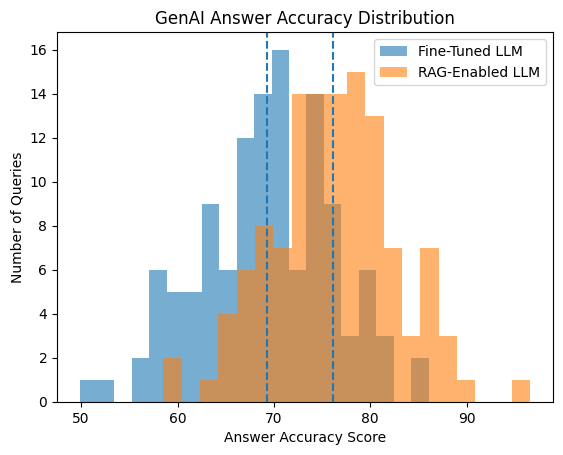

In [30]:
# ------------------------------------------------------------
# Let humans SEE the difference before testing it
# ------------------------------------------------------------

plt.figure()
plt.hist(ft_scores, bins=20, alpha=0.6, label="Fine-Tuned LLM")
plt.hist(rag_scores, bins=20, alpha=0.6, label="RAG-Enabled LLM")

# Mean markers
plt.axvline(ft_scores.mean(), linestyle="--")
plt.axvline(rag_scores.mean(), linestyle="--")

plt.xlabel("Answer Accuracy Score")
plt.ylabel("Number of Queries")
plt.title("GenAI Answer Accuracy Distribution")
plt.legend()
plt.show()


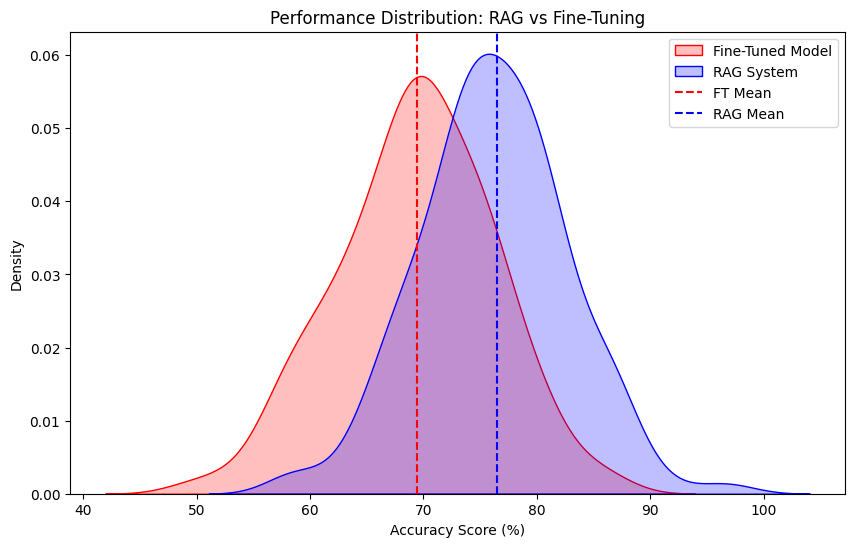

In [31]:
# Kernel Density Estimates
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(ft_scores, label="Fine-Tuned Model", fill=True, color="red")
sns.kdeplot(rag_scores, label="RAG System", fill=True, color="blue")
plt.axvline(mean_ft, color="red", linestyle="--", label="FT Mean")
plt.axvline(mean_rag, color="blue", linestyle="--", label="RAG Mean")
plt.title("Performance Distribution: RAG vs Fine-Tuning")
plt.xlabel("Accuracy Score (%)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [32]:
# ------------------------------------------------------------
# Summary statistics
# ------------------------------------------------------------

mean_ft = ft_scores.mean()
mean_rag = rag_scores.mean()

std_ft = ft_scores.std(ddof=1)
std_rag = rag_scores.std(ddof=1)

print(f"Fine-Tuned LLM Mean Accuracy : {mean_ft:.2f}")  
print(f"RAG-Enabled LLM Mean Accuracy: {mean_rag:.2f}")
print(f"Fine-Tuned LLM Standard Deviation: {std_ft:.2f}")
print(f"RAG-Enabled LLM Standard Deviation: {std_rag:.2f}")


Fine-Tuned LLM Mean Accuracy : 69.30
RAG-Enabled LLM Mean Accuracy: 76.15
Fine-Tuned LLM Standard Deviation: 6.86
RAG-Enabled LLM Standard Deviation: 6.48


In [33]:
# ------------------------------------------------------------
# Hypothesis Testing Setup
# ------------------------------------------------------------
# H0 (Null Hypothesis):
#     RAG does NOT improve accuracy over fine-tuning
#
# H1 (Alternative Hypothesis):
#     RAG improves accuracy (mean_RAG > mean_FT)
#
# This is a ONE-TAILED test


In [34]:
# ------------------------------------------------------------
# Z-Test for Mean Difference (Built from First Principles)
# ------------------------------------------------------------

# Step 1: Standard error of each model's MEAN
# (uncertainty due to finite number of queries)
se_mean_ft = std_ft / np.sqrt(n_queries)
se_mean_rag = std_rag / np.sqrt(n_queries)

# Step 2: Under the null hypothesis, both models have the same true mean
# So we compare how far apart the observed means are
mean_difference = mean_rag - mean_ft

# Step 3: Combine uncertainties from both means
# (independent sources of noise add in quadrature)
se_difference = np.sqrt(se_mean_ft**2 + se_mean_rag**2)

# Step 4: Z-score = signal / noise
z_score = mean_difference / se_difference

# Step 5: One-tailed p-value (RAG > Fine-Tuning)
p_value = 1 - norm.cdf(z_score)

# Output
print(f"Z-score : {z_score:.4f}")
print(f"P-value : {p_value:.6f}")


Z-score : 7.9614
P-value : 0.000000


In [35]:
# ------------------------------------------------------------
# Decision Rule
# ------------------------------------------------------------

alpha = 0.05

print(f"Z-Score : {z_score:.4f}")
print(f"P-Value : {p_value:.6f}")

if p_value < alpha:
    print("\nDecision: Reject the Null Hypothesis")
    print("Insight: RAG provides a statistically significant accuracy gain.")
else:
    print("\nDecision: Fail to Reject the Null Hypothesis")
    print("Insight: Observed improvement may be due to chance.")


Z-Score : 7.9614
P-Value : 0.000000

Decision: Reject the Null Hypothesis
Insight: RAG provides a statistically significant accuracy gain.


In [36]:
# ------------------------------------------------------------
# Final Insight
# ------------------------------------------------------------
# This test does NOT prove that RAG is universally better.
#
# It proves something more important:
# → The observed improvement is too large to ignore as randomness.
#
# In GenAI systems, this is the difference between:
# "It feels better"
# and
# "We can defend this decision with data."
#
# This is why statistical thinking matters in AI evaluation.
